# Data enrichment
When creating the maps we realized that the high outliers (very densly populated ZIP codes or high income ZIP Codes) were grouping most of the areas into one color category. Thus we explore Medians, and Quantiles to create a more comprehensive representation.  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data_final.csv',sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33774 entries, 0 to 33773
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Geographic_Area                  33774 non-null  object 
 1   ZIPCode                          33774 non-null  int64  
 2   Households                       33774 non-null  int64  
 3   Median_Per_Households            31963 non-null  float64
 4   Family_Household                 33683 non-null  float64
 5   Median_Per_Family_Households     31420 non-null  float64
 6   Married_Households               33541 non-null  float64
 7   Median_Per_Married_Households    29934 non-null  float64
 8   NonFamily_Households             33419 non-null  float64
 9   Median_Per_NonFamily_Households  30151 non-null  float64
 10  Country                          33774 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.8+ MB


In [19]:
num_cols = ['Households','Median_Per_Households','Family_Household','Median_Per_Family_Households','Married_Households',
            'Median_Per_Married_Households', 'NonFamily_Households','Median_Per_NonFamily_Households']

In [20]:
data[num_cols].median()

Households                          1011.0
Median_Per_Households              66866.0
Family_Household                     686.0
Median_Per_Family_Households       81493.5
Married_Households                   526.0
Median_Per_Married_Households      92577.0
NonFamily_Households                 311.0
Median_Per_NonFamily_Households    39803.0
dtype: float64

In [21]:
# Dictionary to store quartiles for each numerical column
quartiles_dict = {}

# Calculate quartiles for each numerical column
for column in num_cols:
    quartiles_dict[column] = [data[column].quantile(i / 10) for i in range(11)]

# Create a DataFrame from the quartiles dictionary
quartiles_df = pd.DataFrame(quartiles_dict, index=[f'{i}0%' for i in range(11)])

quartiles_df

,Households,Median_Per_Households,Family_Household,Median_Per_Family_Households,Married_Households,Median_Per_Married_Households,NonFamily_Households,Median_Per_NonFamily_Households
00%,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
10%,64.0,41875.0,39.0,52043.9,29.0,62500.0,17.0,22198.0
20%,170.0,50083.4,111.0,61745.0,87.0,72827.8,53.0,27721.0
30%,334.0,55909.0,223.0,68861.1,174.0,80060.6,105.0,31891.0
40%,588.0,61145.2,395.0,75295.2,307.0,86336.6,183.0,35750.0
50%,1011.0,66866.0,686.0,81493.5,526.0,92577.0,311.0,39803.0
60%,1844.0,72869.2,1233.0,88398.8,926.0,99583.0,558.0,44167.0
70%,3634.1,80584.6,2378.0,96720.2,1741.0,108443.2,1129.0,49331.0
80%,7103.0,91513.0,4500.6,109225.2,3209.0,120668.2,2292.0,56431.0
90%,12143.4,111291.6,7737.8,132020.2,5581.0,144310.3,4259.0,68214.0


In [22]:
correlation_matrix = data[num_cols].corr()

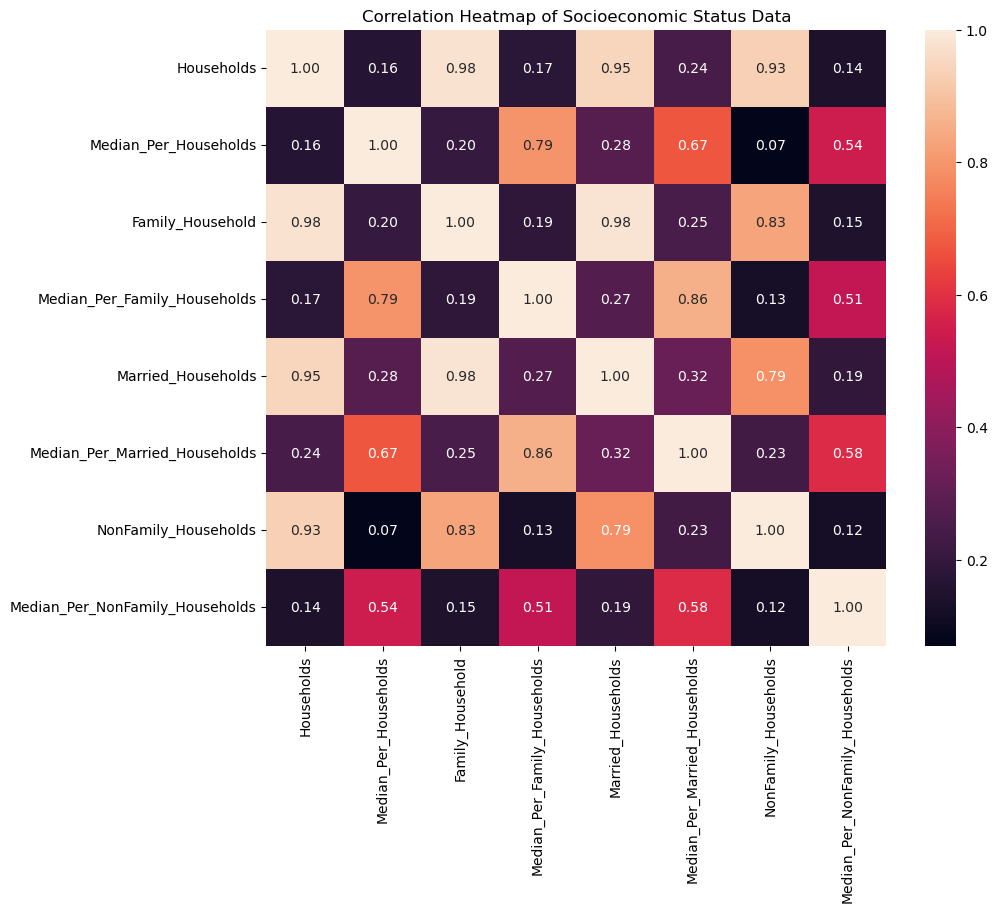

In [23]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Socioeconomic Status Data')
plt.show()